<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/2203a52117/blob/main/capston_project(statml).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/heart (1).csv")
print(data)
print('-----------------------------------------------------------------------------------------------------------------')
x=data.drop(columns=['HeartDisease'],axis=1)
y=data['HeartDisease']
data['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
data['ChestPainType'].replace({'ATA': 0, 'NAP': 1,'ASY':2,'TA':3}, inplace=True)
data['RestingECG'].replace({'Normal': 0, 'ST': 1,'LVH':2}, inplace=True)
data['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace=True)
data['ST_Slope'].replace({'Up': 0, 'Flat': 1,'Down':2}, inplace=True)
#data = data.astype(int)
print(data.head())


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

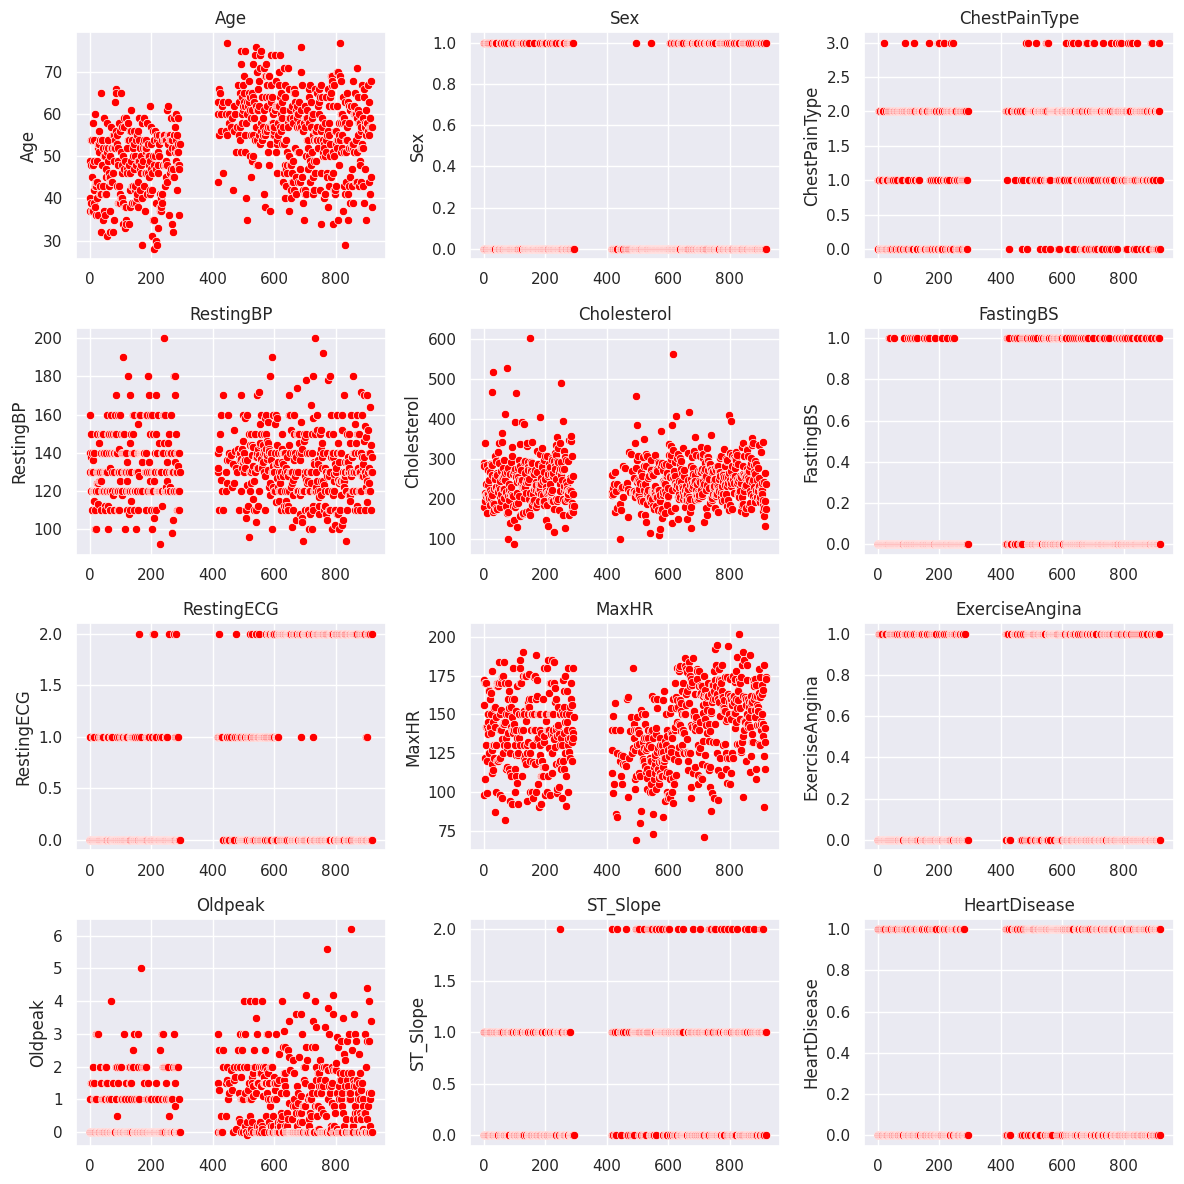


 RestingBP unique values are : 

 [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133 126 139 134 152
 141 137 146 158 123  96 144 131 143 116 104 172 156 114 127 101 174  94
 148 178 165 117 192 129 102 154 164] 


 Cholesterol unique values are : 

 [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303 298 256 117 295 173 315 281 309 200
 336 355 326 171 491 271 274 394 221 126 305 220 242 347 344 358 169 181
 236 203 153

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()
data.head()
data.describe()
num_cols = len(data.columns)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    ax = axes[i]
    sns.scatterplot(data[column], ax=ax, color = "red")
    ax.set_title(column)

for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
data.isnull().sum()
data['RestingBP']
data['Cholesterol'].unique()
data = data[data['RestingBP'] > 1]
data = data[data['Cholesterol'] > 1]
print('\n RestingBP unique values are : \n\n',data['RestingBP'].unique(),'\n')
print('\n Cholesterol unique values are : \n\n',data['Cholesterol'].unique(),'\n')
Nominal_data = ['Sex' ,'RestingECG' ,'ExerciseAngina' ,'ST_Slope']
Ordinal_data = ['ChestPainType']
def logistic_regression(data):
    data = data.fillna(data.mean())
    #columns_to_drop = ['Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Histology', 'Tumour_Stage', 'Gender','ER status','PR status']
    #data = data.drop(columns=columns_to_drop)
    if data['HeartDisease'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")
    features = data.drop('HeartDisease', axis=1)
    target = data['HeartDisease'].astype(int)
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    logistic_reg = LogisticRegression()
    logistic_reg.fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
logistic_regression(data)

